# Black-Scholes Model: Plotting Call/Put European Option Pricing

The Black-Scholes model is a foundational tool in quantitative finance for valuing European options. At its core, the model uses the following cumulative standard normal distribution:

$$
N(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{1}{2} \phi^2} \, d\phi.
$$

The **key variables** are:

- **$S_t$**: The current price of the underlying stock or asset at time $t$.
- **$K$**: The strike price of the option (the price at which you can buy or sell the asset).
- **$T$**: The expiration time (when the option contract ends).
- **$\tau$**: The time to maturity, calculated as $\tau = T - t$ (the time remaining until expiration).
- **$r$**: The risk-free interest rate (typically the yield on government bonds).
- **$q$**: The dividend yield (the annual dividend paid by the stock, as a percentage of its price).
- **$\sigma$**: The volatility of the stock (a measure of how much the stock price fluctuates).
- **$N(x)$**: The cumulative distribution function of the standard normal distribution, representing the probability that a normally distributed random variable is less than or equal to $x$.

The Black-Scholes formulas for European call and put options are:

### Call Option Value

$$
C(S_t, t) = S_t e^{-q\tau} N(d_1) - K e^{-r\tau} N(d_2)
\tag{1}
$$

### Put Option Value

$$
P(S_t, t) = K e^{-r\tau} N(-d_2) - S_t e^{-q\tau} N(-d_1)
\tag{2}
$$

The terms $d_1$ and $d_2$ are defined as:

$$
d_1 = \frac{\log \left( \frac{S_t}{K} \right) + (r - q + \frac{1}{2} \sigma^2) \tau}{\sigma \sqrt{\tau}}
\tag{3}
$$

$$
d_2 = d_1 - \sigma \sqrt{\tau}
\tag{4}
$$

These equations allow us to compute the fair price of European call and put options at any time $t$ before expiration, given the market parameters above.

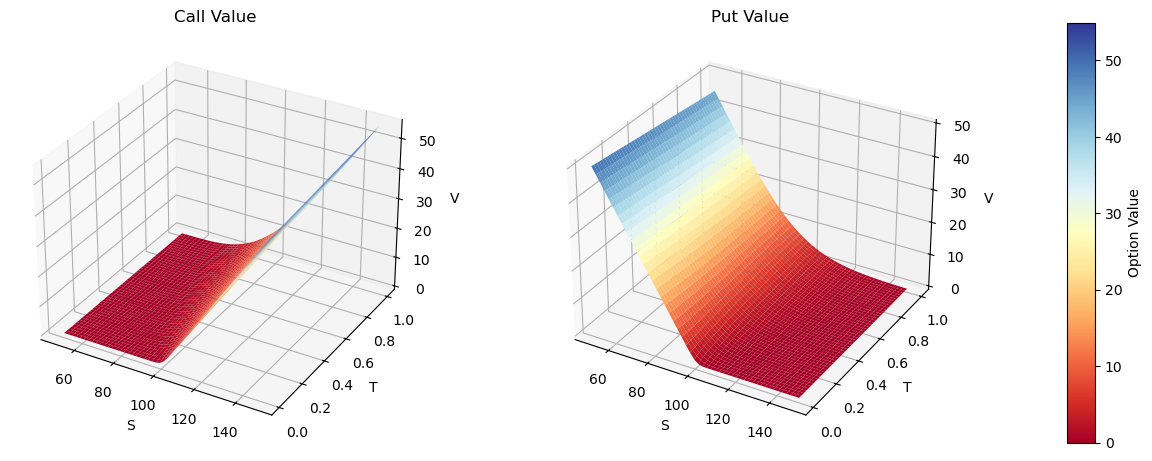

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm

# Black-Scholes formula for call and put
def black_scholes_call(S, K, T, r, sigma, q=0):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def black_scholes_put(S, K, T, r, sigma, q=0):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

# Parameters
K = 100
r = 0.05
sigma = 0.2

# Create a grid of S and T values
S = np.linspace(50, 150, 50)
T = np.linspace(0.01, 1, 50)  # Avoid T=0 to prevent division by zero
S_grid, T_grid = np.meshgrid(S, T)

# Calculate call and put prices over the grid
call_surface = black_scholes_call(S_grid, K, T_grid, r, sigma)
put_surface = black_scholes_put(S_grid, K, T_grid, r, sigma)

# Create side-by-side 3D plots
fig = plt.figure(figsize=(14, 6))

# Call Option Plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(S_grid, T_grid, call_surface, cmap=cm.RdYlBu, vmin=0, vmax=max(call_surface.max(), put_surface.max()))
ax1.set_title('Call Value')
ax1.set_xlabel('S')
ax1.set_ylabel('T')
ax1.set_zlabel('V')

# Put Option Plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(S_grid, T_grid, put_surface, cmap=cm.RdYlBu, vmin=0, vmax=max(call_surface.max(), put_surface.max()))
ax2.set_title('Put Value')
ax2.set_xlabel('S')
ax2.set_ylabel('T')
ax2.set_zlabel('V')

# Colorbar
plt.subplots_adjust(right=0.80, wspace=0.3)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(surf1, cax=cbar_ax, label='Option Value')

plt.show()